# Configurações Iniciais

No universo do desenvolvimento de modelos de dados, diversos fatores podem influenciar o desempenho e a precisão de um modelo. Estes fatores, muitas vezes, estão relacionados às variáveis ou colunas escolhidas para alimentar o modelo. Nesse contexto, este documento busca elucidar uma particularidade observada em nossa última análise.

A coluna "winning_price" foi identificada como uma variável de interesse, principalmente devido à sua aparente relevância para o cliente. A expectativa inicial era de que a integração dessa coluna ao modelo poderia melhorar significativamente a sua eficácia. No entanto, após diversos testes e análises, constatou-se uma tendência contrária. Ao invés de contribuir positivamente para o desempenho do modelo, a adição da coluna "winning_price" resultou em uma diminuição da precisão e eficácia do mesmo.

Em conclusão, é imperativo que se reconheça a complexidade e os desafios inerentes ao processo de seleção e integração de variáveis em modelos de dados. Mesmo colunas que, à primeira vista, parecem ser altamente.

In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import tkinter
import plotly.express as px
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
import xgboost as xgb

# Retirar os limitadores de coluna
pd.set_option('display.max_columns', None)

# Unindo as bases de dados e removendo as não utilizadas
df_2020 = pd.read_csv(r"C:\Users\User\Documents\localM3\dados\base_inteli 2020_2021.csv", ';')
df_2022 = pd.read_csv(r"C:\Users\User\Documents\localM3\dados\base_inteli_2022_2023.csv", ';')
df_all = pd.concat([df_2020, df_2022])

C:\Users\User\AppData\Local\Temp\ipykernel_16164\2315140475.py:25: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_2020 = pd.read_csv(r"C:\Users\User\Documents\localM3\dados\base_inteli 2020_2021.csv", ';')
C:\Users\User\AppData\Local\Temp\ipykernel_16164\2315140475.py:26: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_2022 = pd.read_csv(r"C:\Users\User\Documents\localM3\dados\base_inteli_2022_2023.csv", ';')


# Exploração dos dados


###Identificação das colunas

A identificação das colunas desempenha um papel importante no processo de exploração. Através dela, podemos conhecer mais sobre os tipos de dados presente em cada coluna e direcionar o tratamento adequado que iremos utilizar para cada caso.

In [2]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814134 entries, 0 to 433253
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          814134 non-null  object 
 1   weekday_name                  814134 non-null  object 
 2   sku                           814134 non-null  object 
 3   unit_price                    814134 non-null  float64
 4   mobly_item                    814134 non-null  object 
 5   shipment_type                 814134 non-null  object 
 6   anchor_category               814134 non-null  object 
 7   product_department            814134 non-null  object 
 8   product_category              814134 non-null  object 
 9   origin_country                814134 non-null  object 
 10  process_costing               814134 non-null  object 
 11  sku_color                     814134 non-null  object 
 12  sku_height                    780110 non-nul

Através do método `info()`, foi possível classificar nossas características em numéricas ou categóricas:

**Colunas numéricas**

---

* unit_price
* sku_height
* sku_width
* sku_length
* sku_weight
* winning_price
* revenue
* items_sold
* avg_website_visits_last_week
* supplier_delivery_time
* stock_qty
* revenue_bundle
* items_sold_bundle
<br>
<br>

**Colunas categóricas**

---



* date
* weekday_name
* sku
* mobly_item
* shipment_type
* anchor_category
* product_department
* product_category
* origin_country
* process_costing
* sku_color
* price_status
* flag_bundle

###Estatística descritiva das colunas



A estatística descritiva é uma parte da estatística que envolve a coleta, organização, resumo e interpretação de dados para descrever características importantes de um conjunto de informações. Ela se concentra em transformar dados brutos em informações compreensíveis e significativas, permitindo uma compreensão mais clara das tendências, padrões e distribuições presentes nos dados.

Para o caso do nosso projeto, a estatística descritiva desempenha um papel importante para a ideação de um modelo preditivo de regressão. Antes de construir esse modelo, é fundamental entender a distribuição dos dados históricos de vendas. Então, a estatística descritiva, como a média, mediana, desvio padrão e percentis, ajuda a identificar não apenas as tendências, mas também os outliers nos dados de vendas passados.

O método nativo `describe()` da biblioteca Pandas foi utilizado para fazer a análise exploratória dos dados, já que fornece estatísticas para cada uma das colunas do dataframe.

In [3]:
df_all.describe()

,unit_price,sku_height,sku_width,sku_length,sku_weight,winning_price,revenue,items_sold,avg_website_visits_last_week,supplier_delivery_time,stock_qty,revenue_bundle,items_sold_bundle
count,814134.000000,780110.000000,780110.000000,780110.000000,780110.000000,163366.000000,814134.000000,814134.000000,814134.000000,814134.000000,814134.000000,814134.000000,814134.000000
mean,1072.653216,37.777547,73.354083,145.321921,59.136370,827.837739,1902.447319,2.672200,110.400421,23.383754,61.298798,96.368492,0.698966
std,788.378231,23.959331,27.939949,61.974311,76.332352,667.010802,4243.519909,6.041399,178.343749,27.321443,165.504622,627.624312,1.242135
min,69.990000,0.200000,0.800000,1.000000,1.000000,0.990000,-32.660000,0.000000,0.000000,2.000000,-1.000000,0.000000,0.000000
25%,535.860000,13.000000,51.000000,90.000000,16.200000,366.900000,0.000000,0.000000,20.000000,8.000000,0.000000,0.000000,0.000000
50%,859.900000,35.000000,75.000000,152.000000,36.000000,692.540000,636.200000,1.000000,51.857143,11.000000,2.000000,0.000000,1.000000
75%,1399.980000,60.000000,90.000000,189.000000,63.850000,1072.820000,2201.650000,3.000000,127.714286,17.000000,57.000000,0.000000,1.000000
max,13750.000000,152.000000,240.000000,690.000000,553.570000,9399.860000,393247.510000,647.000000,8038.285714,80.000000,4426.000000,69583.980000,164.000000


O método "lag rows" é uma função analítica SQL que permite acessar os dados de uma linha anterior na tabela sem precisar mudar a ordem dos dados. Ela é muito útil quando se deseja comparar os valores de uma linha com os valores da linha anterior, por exemplo, para calcular as diferenças ou identificar mudanças.
O seguinte código apresenta o pré-processamento da "tabela winning_price" utilizando um método que simula a função LAG (lag rows) do SQL. Esse método possibilita a comparação entre registros consecutivos da tabela, permitindo analisar a variação ou diferença entre eles, sem alterar a sequência original dos dados.

In [4]:
# Ordena o DataFrame por 'sku' e 'date', e reinicia o índice.
df_all = df_all.sort_values(by=['sku', 'date']).reset_index(drop=True)

# Função para preencher NaNs usando valores próximos no grupo.
def fill_within_group(group):
    return group.fillna(method='ffill').fillna(method='bfill')

# Preenche NaNs na coluna 'winning_price' por grupo de 'sku'.
df_all['winning_price'] = df_all.groupby('sku')['winning_price'].transform(fill_within_group)

# Preenche quaisquer NaNs restantes com 0.
df_all['winning_price'] = df_all['winning_price'].fillna(0)

# Mostra as 10 primeiras linhas.
df_all.head(10)


,date,weekday_name,sku,unit_price,mobly_item,shipment_type,anchor_category,product_department,product_category,origin_country,process_costing,sku_color,sku_height,sku_width,sku_length,sku_weight,price_status,winning_price,revenue,items_sold,avg_website_visits_last_week,supplier_delivery_time,stock_qty,flag_bundle,revenue_bundle,items_sold_bundle
0,2020-01-01,Wednesday,AC967UP19DSYMOB-181803,1223.99,mobly item,crossdocking,Sofas,Keva,Sala de Estar,Nacional,no,cinza,72.0,84.0,160.0,45.0,Sem Registro,0.0,2398.25,2,112.142857,12,84,SKU vendido em conjunto ou sozinho,0.0,1
1,2020-01-02,Thursday,AC967UP19DSYMOB-181803,1169.99,mobly item,crossdocking,Sofas,Keva,Sala de Estar,Nacional,no,cinza,72.0,84.0,160.0,45.0,Sem Registro,0.0,2516.86,2,113.857143,12,84,SKU vendido em conjunto ou sozinho,0.0,1
2,2020-01-03,Friday,AC967UP19DSYMOB-181803,1169.99,mobly item,crossdocking,Sofas,Keva,Sala de Estar,Nacional,no,cinza,72.0,84.0,160.0,45.0,Sem Registro,0.0,2375.08,2,115.857143,12,76,SKU vendido em conjunto ou sozinho,0.0,1
3,2020-01-04,Saturday,AC967UP19DSYMOB-181803,1169.99,mobly item,crossdocking,Sofas,Keva,Sala de Estar,Nacional,no,cinza,72.0,84.0,160.0,45.0,Sem Registro,0.0,5777.86,5,121.714286,12,73,SKU vendido em conjunto ou sozinho,0.0,1
4,2020-01-05,Sunday,AC967UP19DSYMOB-181803,1169.99,mobly item,crossdocking,Sofas,Keva,Sala de Estar,Nacional,no,cinza,72.0,84.0,160.0,45.0,Sem Registro,0.0,4686.87,4,132.714286,12,70,SKU vendido em conjunto ou sozinho,0.0,1
5,2020-01-06,Monday,AC967UP19DSYMOB-181803,1169.99,mobly item,crossdocking,Sofas,Keva,Sala de Estar,Nacional,no,cinza,72.0,84.0,160.0,45.0,Sem Registro,0.0,1052.99,1,136.857143,12,70,SKU vendido em conjunto ou sozinho,0.0,1
6,2020-01-07,Tuesday,AC967UP19DSYMOB-181803,1169.99,mobly item,crossdocking,Sofas,Keva,Sala de Estar,Nacional,no,cinza,72.0,84.0,160.0,45.0,Sem Registro,0.0,6385.61,5,142.857143,12,65,SKU vendido em conjunto ou sozinho,0.0,1
7,2020-01-08,Wednesday,AC967UP19DSYMOB-181803,1169.99,mobly item,crossdocking,Sofas,Keva,Sala de Estar,Nacional,no,cinza,72.0,84.0,160.0,45.0,Sem Registro,0.0,2390.90,2,154.285714,12,60,SKU vendido em conjunto ou sozinho,0.0,1
8,2020-01-09,Thursday,AC967UP19DSYMOB-181803,1251.99,mobly item,crossdocking,Sofas,Keva,Sala de Estar,Nacional,no,cinza,72.0,84.0,160.0,45.0,Sem Registro,0.0,3936.24,3,158.000000,12,58,SKU vendido em conjunto ou sozinho,0.0,1
9,2020-01-10,Friday,AC967UP19DSYMOB-181803,1251.99,mobly item,crossdocking,Sofas,Keva,Sala de Estar,Nacional,no,cinza,72.0,84.0,160.0,45.0,Sem Registro,0.0,2638.54,2,164.285714,12,65,SKU vendido em conjunto ou sozinho,0.0,1


Com o banco de dados original apresentando algumas informações faltantes em certas linhas, as estatísticas descritivas puderam ser utilizadas para imputar os dados ausentes. Isso pôde ser feito por meio da utilização da mediana, por exemplo, atribuindo o valor dessa tendência central nos campos em branco.

# Pré-processamento


###Limpeza de dados


**Tratamento de missings e remoção das colunas**

---
Removemos as colunas que possuíam somente um valor exclusivo, aquelas que apresentavam mais de 50% dos seus valores vazios ou sem registro e as que continham valores irrelevantes para o nosso modelo.

As colunas possuíam poucos missing values, apenas presentes em algumas dimensões de sku’s, então optamos por substituir esses valores por 0, visto que a inexistência de informações sobre suas dimensões não alterava em sua venda.

In [5]:
df_fixed = df_all.drop(["mobly_item", 'revenue','revenue_bundle', 'price_status'], axis ='columns').fillna(0).reset_index(drop = True)
display(df_fixed)

,date,weekday_name,sku,unit_price,shipment_type,anchor_category,product_department,product_category,origin_country,process_costing,sku_color,sku_height,sku_width,sku_length,sku_weight,winning_price,items_sold,avg_website_visits_last_week,supplier_delivery_time,stock_qty,flag_bundle,items_sold_bundle
0,2020-01-01,Wednesday,AC967UP19DSYMOB-181803,1223.99,crossdocking,Sofas,Keva,Sala de Estar,Nacional,no,cinza,72.0,84.0,160.0,45.0,0.00,2,112.142857,12,84,SKU vendido em conjunto ou sozinho,1
1,2020-01-02,Thursday,AC967UP19DSYMOB-181803,1169.99,crossdocking,Sofas,Keva,Sala de Estar,Nacional,no,cinza,72.0,84.0,160.0,45.0,0.00,2,113.857143,12,84,SKU vendido em conjunto ou sozinho,1
2,2020-01-03,Friday,AC967UP19DSYMOB-181803,1169.99,crossdocking,Sofas,Keva,Sala de Estar,Nacional,no,cinza,72.0,84.0,160.0,45.0,0.00,2,115.857143,12,76,SKU vendido em conjunto ou sozinho,1
3,2020-01-04,Saturday,AC967UP19DSYMOB-181803,1169.99,crossdocking,Sofas,Keva,Sala de Estar,Nacional,no,cinza,72.0,84.0,160.0,45.0,0.00,5,121.714286,12,73,SKU vendido em conjunto ou sozinho,1
4,2020-01-05,Sunday,AC967UP19DSYMOB-181803,1169.99,crossdocking,Sofas,Keva,Sala de Estar,Nacional,no,cinza,72.0,84.0,160.0,45.0,0.00,4,132.714286,12,70,SKU vendido em conjunto ou sozinho,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814129,2023-06-29,Thursday,ZA664UP99WDSMOB-984989,2297.95,crossdocking,Sofas,Móveis,Sala de Estar,Nacional,no,cinza,100.0,100.0,200.0,50.0,1914.22,0,37.000000,10,0,SKU vendido somente sozinho,0
814130,2023-06-30,Friday,ZA664UP99WDSMOB-984989,2297.95,crossdocking,Sofas,Móveis,Sala de Estar,Nacional,no,cinza,100.0,100.0,200.0,50.0,1914.22,0,36.571429,10,0,SKU vendido somente sozinho,0
814131,2023-07-01,Saturday,ZA664UP99WDSMOB-984989,2297.95,crossdocking,Sofas,Móveis,Sala de Estar,Nacional,no,cinza,100.0,100.0,200.0,50.0,1914.22,2,38.142857,10,0,SKU vendido somente sozinho,1
814132,2023-07-02,Sunday,ZA664UP99WDSMOB-984989,2297.95,crossdocking,Sofas,Móveis,Sala de Estar,Nacional,no,cinza,100.0,100.0,200.0,50.0,1871.68,0,41.142857,10,0,SKU vendido somente sozinho,0


### Adequação de variáveis numéricas e categóricas


**Separação das variáveis**

---
*(Revisar e corrigir)*<BR>
Todas as colunas identificadas como categóricas em nossa database foram percorridas, contando o número de valores únicos presentes. Com base nessa contagem, foi possível compreender a variedade de categorias por atributo, separando as colunas pelo método que seriam codificadas: One-Hot Encoder ou Label Encoder.

In [6]:
columns = list(df_fixed.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df_fixed[i].unique()) > 7:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)



print('Label Encoding: ',numeric_columns)
print('One-Hot Encoding: ',categoric_columns)

Label Encoding:  ['date', 'sku', 'unit_price', 'anchor_category', 'product_category', 'sku_color', 'sku_height', 'sku_width', 'sku_length', 'sku_weight', 'winning_price', 'items_sold', 'avg_website_visits_last_week', 'supplier_delivery_time', 'stock_qty', 'items_sold_bundle']
One-Hot Encoding:  ['weekday_name', 'shipment_type', 'product_department', 'origin_country', 'process_costing', 'flag_bundle']


**One-Hot Encoder**


---

Empregamos o One-Hot Encoder em colunas categóricas com até 7 elementos. Essa escolha foi feita para converter essas colunas em um formato binário sem sobrecarregar o sistema. O processo desse codificador gera uma coluna nova para representar cada categoria, na qual o valor é atribuído como "1" ou "0" para indicar se está presente ou ausente, respectivamente.





In [7]:
# Selecionando as colunas para sofrerem codificação
columns_to_encode = ['shipment_type', 'product_department', 'origin_country', 'process_costing', 'flag_bundle']
data_to_encode = df_fixed[columns_to_encode]

# Transformando as colunas para um novo DataFrame
encoder = OneHotEncoder(sparse=False)
encoded = encoder.fit_transform(data_to_encode)
df_oneHot = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(columns_to_encode))

# Substituir as colunas originais pelas colunas do df_oneHot
df_fixed_encoded = df_fixed.drop(columns=columns_to_encode)  # Remover as colunas originais
df_fixed_encoded = pd.concat([df_fixed_encoded, df_oneHot], axis=1)  # Concatenar as colunas codificadas

display(df_fixed_encoded)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,date,weekday_name,sku,unit_price,anchor_category,product_category,sku_color,sku_height,sku_width,sku_length,sku_weight,winning_price,items_sold,avg_website_visits_last_week,supplier_delivery_time,stock_qty,items_sold_bundle,shipment_type_crossdocking,shipment_type_próprio,product_department_Cama e Banho,product_department_Decoração,product_department_Gamer,product_department_Infantil,product_department_Keva,product_department_Móveis,origin_country_Importado,origin_country_Nacional,process_costing_no,process_costing_yes,flag_bundle_SKU vendido em conjunto ou sozinho,flag_bundle_SKU vendido somente sozinho
0,2020-01-01,Wednesday,AC967UP19DSYMOB-181803,1223.99,Sofas,Sala de Estar,cinza,72.0,84.0,160.0,45.0,0.00,2,112.142857,12,84,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,2020-01-02,Thursday,AC967UP19DSYMOB-181803,1169.99,Sofas,Sala de Estar,cinza,72.0,84.0,160.0,45.0,0.00,2,113.857143,12,84,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,2020-01-03,Friday,AC967UP19DSYMOB-181803,1169.99,Sofas,Sala de Estar,cinza,72.0,84.0,160.0,45.0,0.00,2,115.857143,12,76,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,2020-01-04,Saturday,AC967UP19DSYMOB-181803,1169.99,Sofas,Sala de Estar,cinza,72.0,84.0,160.0,45.0,0.00,5,121.714286,12,73,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,2020-01-05,Sunday,AC967UP19DSYMOB-181803,1169.99,Sofas,Sala de Estar,cinza,72.0,84.0,160.0,45.0,0.00,4,132.714286,12,70,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814129,2023-06-29,Thursday,ZA664UP99WDSMOB-984989,2297.95,Sofas,Sala de Estar,cinza,100.0,100.0,200.0,50.0,1914.22,0,37.000000,10,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
814130,2023-06-30,Friday,ZA664UP99WDSMOB-984989,2297.95,Sofas,Sala de Estar,cinza,100.0,100.0,200.0,50.0,1914.22,0,36.571429,10,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
814131,2023-07-01,Saturday,ZA664UP99WDSMOB-984989,2297.95,Sofas,Sala de Estar,cinza,100.0,100.0,200.0,50.0,1914.22,2,38.142857,10,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
814132,2023-07-02,Sunday,ZA664UP99WDSMOB-984989,2297.95,Sofas,Sala de Estar,cinza,100.0,100.0,200.0,50.0,1871.68,0,41.142857,10,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


**Label Encoder**


---

Utilizamos o Label Encoder em colunas categóricas com 7 ou mais elementos. Nesse processo, cada item da categoria era atribuído a um número inteiro distinto, não expandindo o número de colunas.




In [8]:
# Agrupa os items vendidos de acordo com cada item de uma coluna
color_sums = df_fixed_encoded.groupby(['sku_color'])['items_sold'].sum().sort_values(ascending=True)
sku_sums = df_fixed_encoded.groupby(['sku'])['items_sold'].sum().sort_values(ascending=True)
anchor_sums = df_fixed_encoded.groupby(['anchor_category'])['items_sold'].sum().sort_values(ascending=True)
product_sums = df_fixed_encoded.groupby(['product_category'])['items_sold'].sum().sort_values(ascending=True)

# Cria um dicionário mapeando as cores de forma ordinal (Maior para menor)
color_ordinal_mapping = {color: i for i, color in enumerate(color_sums.index)}
sku_ordinal_mapping = {sku: i for i, sku in enumerate(sku_sums.index)}
anchor_ordinal_mapping = {anchor: i for i, anchor in enumerate(anchor_sums.index)}
product_ordinal_mapping = {product: i for i, product in enumerate(product_sums.index)}

# Aplica Ordinal encoding
encoder_color = OrdinalEncoder(categories=[list(color_ordinal_mapping.keys())])
encoder_sku = OrdinalEncoder(categories=[list(sku_ordinal_mapping.keys())])
encoder_anchor = OrdinalEncoder(categories=[list(anchor_ordinal_mapping.keys())])
encoder_product = OrdinalEncoder(categories=[list(product_ordinal_mapping.keys())])

# Cria as novas colunas
df_fixed_encoded['color_encoded'] = encoder_color.fit_transform(df_fixed_encoded[['sku_color']])
df_fixed_encoded['sku_encoded'] = encoder_sku.fit_transform(df_fixed_encoded[['sku']])
df_fixed_encoded['anchor_category_encoded'] = encoder_anchor.fit_transform(df_fixed_encoded[['anchor_category']])
df_fixed_encoded['product_category_encoded'] = encoder_product.fit_transform(df_fixed_encoded[['product_category']])

df_encoded = df_fixed_encoded.drop(['sku','anchor_category','product_category','sku_color'], axis = 1)

display(df_encoded)

,date,weekday_name,unit_price,sku_height,sku_width,sku_length,sku_weight,winning_price,items_sold,avg_website_visits_last_week,supplier_delivery_time,stock_qty,items_sold_bundle,shipment_type_crossdocking,shipment_type_próprio,product_department_Cama e Banho,product_department_Decoração,product_department_Gamer,product_department_Infantil,product_department_Keva,product_department_Móveis,origin_country_Importado,origin_country_Nacional,process_costing_no,process_costing_yes,flag_bundle_SKU vendido em conjunto ou sozinho,flag_bundle_SKU vendido somente sozinho,color_encoded,sku_encoded,anchor_category_encoded,product_category_encoded
0,2020-01-01,Wednesday,1223.99,72.0,84.0,160.0,45.0,0.00,2,112.142857,12,84,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36.0,417.0,27.0,15.0
1,2020-01-02,Thursday,1169.99,72.0,84.0,160.0,45.0,0.00,2,113.857143,12,84,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36.0,417.0,27.0,15.0
2,2020-01-03,Friday,1169.99,72.0,84.0,160.0,45.0,0.00,2,115.857143,12,76,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36.0,417.0,27.0,15.0
3,2020-01-04,Saturday,1169.99,72.0,84.0,160.0,45.0,0.00,5,121.714286,12,73,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36.0,417.0,27.0,15.0
4,2020-01-05,Sunday,1169.99,72.0,84.0,160.0,45.0,0.00,4,132.714286,12,70,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36.0,417.0,27.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814129,2023-06-29,Thursday,2297.95,100.0,100.0,200.0,50.0,1914.22,0,37.000000,10,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,36.0,30.0,27.0,15.0
814130,2023-06-30,Friday,2297.95,100.0,100.0,200.0,50.0,1914.22,0,36.571429,10,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,36.0,30.0,27.0,15.0
814131,2023-07-01,Saturday,2297.95,100.0,100.0,200.0,50.0,1914.22,2,38.142857,10,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,36.0,30.0,27.0,15.0
814132,2023-07-02,Sunday,2297.95,100.0,100.0,200.0,50.0,1871.68,0,41.142857,10,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,36.0,30.0,27.0,15.0


**Tratamento de datas**


---
A coluna "date" possui uma alta relevância para nosso modelo, porém necessitava ser modificada para se adaptar melhor ao funcionamento dele.

Transformamos seu formato de Ano / Mês / Dia para uma divisão em diversas colunas representando. Assim, o modelo consegue ler melhor os dados de data uma vez que eles foram passados de String > DateTime > Números, facilitando o entendimento da máquina e do modelo.


In [9]:
# Transformar os valores de "String" de data em "DateTime"
df_encoded['date'] = pd.to_datetime(df_encoded['date'], format='%Y-%m-%d')

# Extraindo os componentes da date
df_encoded['ano'] = df_encoded['date'].dt.year
df_encoded['mes'] = df_encoded['date'].dt.month
df_encoded['dia'] = df_encoded['date'].dt.day
df_encoded['dia_da_semana'] = df_encoded['date'].dt.weekday  # 0: Segunda-feira, 1: Terça-feira, etc.
df_encoded['semana_do_ano'] = df_encoded['date'].dt.isocalendar().week
df_encoded['trimestre'] = df_encoded['date'].dt.quarter
df_encoded['dia_do_ano'] = df_encoded['date'].dt.dayofyear
df_encoded['eh_fim_de_semana'] = df_encoded['date'].dt.weekday >= 5  # Retorna True para sábado e domingo

# Remoção das colunas antigas
df_dates_fixed = df_encoded.drop(['date','weekday_name'], axis = 1)
df_dates_fixed

,unit_price,sku_height,sku_width,sku_length,sku_weight,winning_price,items_sold,avg_website_visits_last_week,supplier_delivery_time,stock_qty,items_sold_bundle,shipment_type_crossdocking,shipment_type_próprio,product_department_Cama e Banho,product_department_Decoração,product_department_Gamer,product_department_Infantil,product_department_Keva,product_department_Móveis,origin_country_Importado,origin_country_Nacional,process_costing_no,process_costing_yes,flag_bundle_SKU vendido em conjunto ou sozinho,flag_bundle_SKU vendido somente sozinho,color_encoded,sku_encoded,anchor_category_encoded,product_category_encoded,ano,mes,dia,dia_da_semana,semana_do_ano,trimestre,dia_do_ano,eh_fim_de_semana
0,1223.99,72.0,84.0,160.0,45.0,0.00,2,112.142857,12,84,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36.0,417.0,27.0,15.0,2020,1,1,2,1,1,1,False
1,1169.99,72.0,84.0,160.0,45.0,0.00,2,113.857143,12,84,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36.0,417.0,27.0,15.0,2020,1,2,3,1,1,2,False
2,1169.99,72.0,84.0,160.0,45.0,0.00,2,115.857143,12,76,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36.0,417.0,27.0,15.0,2020,1,3,4,1,1,3,False
3,1169.99,72.0,84.0,160.0,45.0,0.00,5,121.714286,12,73,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36.0,417.0,27.0,15.0,2020,1,4,5,1,1,4,True
4,1169.99,72.0,84.0,160.0,45.0,0.00,4,132.714286,12,70,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36.0,417.0,27.0,15.0,2020,1,5,6,1,1,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814129,2297.95,100.0,100.0,200.0,50.0,1914.22,0,37.000000,10,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,36.0,30.0,27.0,15.0,2023,6,29,3,26,2,180,False
814130,2297.95,100.0,100.0,200.0,50.0,1914.22,0,36.571429,10,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,36.0,30.0,27.0,15.0,2023,6,30,4,26,2,181,False
814131,2297.95,100.0,100.0,200.0,50.0,1914.22,2,38.142857,10,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,36.0,30.0,27.0,15.0,2023,7,1,5,26,3,182,True
814132,2297.95,100.0,100.0,200.0,50.0,1871.68,0,41.142857,10,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,36.0,30.0,27.0,15.0,2023,7,2,6,26,3,183,True


**Normalização de colunas e outliers**


---
Os dados numéricos foram analisados para verificar a necessidade de tratamento de outliers, valores muito grandes ou destoantes em relação aos outros no dataframe.

Foi realizada uma normalização onde esses valores foram transformados em valores entre -1 e 1, mantendo sua grandeza entre si, mas não influenciando por seu tamanho e sim mais por sua força de correlação com os demais atributos.

In [10]:
# Seleção de características para serem normalizadas
df_toScale = df_dates_fixed[['avg_website_visits_last_week','sku_height','sku_width','sku_length','sku_weight','unit_price','supplier_delivery_time']]

# Criando o objeto StandardScaler
scaler = StandardScaler()

# Ajustando e transformando os dados
df_scaled = pd.DataFrame(scaler.fit_transform(df_toScale), columns=df_toScale.columns)

# Removendo as colunas antigas e unindo as novas
replace = df_dates_fixed.drop(['avg_website_visits_last_week','sku_height','sku_width','sku_length','sku_weight','unit_price','supplier_delivery_time'], axis = 1)
df_final = replace.join(df_scaled, rsuffix='_right')
display(df_final)

,winning_price,items_sold,stock_qty,items_sold_bundle,shipment_type_crossdocking,shipment_type_próprio,product_department_Cama e Banho,product_department_Decoração,product_department_Gamer,product_department_Infantil,product_department_Keva,product_department_Móveis,origin_country_Importado,origin_country_Nacional,process_costing_no,process_costing_yes,flag_bundle_SKU vendido em conjunto ou sozinho,flag_bundle_SKU vendido somente sozinho,color_encoded,sku_encoded,anchor_category_encoded,product_category_encoded,ano,mes,dia,dia_da_semana,semana_do_ano,trimestre,dia_do_ano,eh_fim_de_semana,avg_website_visits_last_week,sku_height,sku_width,sku_length,sku_weight,unit_price,supplier_delivery_time
0,0.00,2,84,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36.0,417.0,27.0,15.0,2020,1,1,2,1,1,1,False,0.009770,1.452878,0.441734,0.308453,-0.154193,0.191960,-0.416660
1,0.00,2,84,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36.0,417.0,27.0,15.0,2020,1,2,3,1,1,2,False,0.019382,1.452878,0.441734,0.308453,-0.154193,0.123465,-0.416660
2,0.00,2,76,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36.0,417.0,27.0,15.0,2020,1,3,4,1,1,3,False,0.030597,1.452878,0.441734,0.308453,-0.154193,0.123465,-0.416660
3,0.00,5,73,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36.0,417.0,27.0,15.0,2020,1,4,5,1,1,4,True,0.063439,1.452878,0.441734,0.308453,-0.154193,0.123465,-0.416660
4,0.00,4,70,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,36.0,417.0,27.0,15.0,2020,1,5,6,1,1,5,True,0.125117,1.452878,0.441734,0.308453,-0.154193,0.123465,-0.416660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814129,1914.22,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,36.0,30.0,27.0,15.0,2023,6,29,3,26,2,180,False,-0.411567,2.589168,0.957196,0.903023,-0.088101,1.554200,-0.489863
814130,1914.22,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,36.0,30.0,27.0,15.0,2023,6,30,4,26,2,181,False,-0.413970,2.589168,0.957196,0.903023,-0.088101,1.554200,-0.489863
814131,1914.22,2,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,36.0,30.0,27.0,15.0,2023,7,1,5,26,3,182,True,-0.405159,2.589168,0.957196,0.903023,-0.088101,1.554200,-0.489863
814132,1871.68,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,36.0,30.0,27.0,15.0,2023,7,2,6,26,3,183,True,-0.388338,2.589168,0.957196,0.903023,-0.088101,1.554200,-0.489863


# Preparação dos dados

### Seleção das features para o modelo de machine learning
---
Uma das etapas cruciais na construção de um modelo de machine learning é a seleção criteriosa das características (features) que servirão como entrada para o modelo. Cada feature foi selecionada com base em sua relevância para o problema em questão, e essa decisão é fundamental para garantir que nosso modelo seja capaz de aprender com eficácia e gerar previsões precisas.

In [18]:
#Features escolhidas para o modelo
features = ['winning_price','stock_qty' ,'color_encoded',	'sku_encoded',	'anchor_category_encoded',	'product_category_encoded',	'ano',	'mes',	'dia',	'dia_da_semana',	'semana_do_ano',	'trimestre',	'dia_do_ano',	'eh_fim_de_semana',	'avg_website_visits_last_week',	'unit_price',	'supplier_delivery_time']

### Divisão do conjunto de treino e de teste
---
Para avaliar a capacidade de generalização do modelo, é necessário dividir o conjunto de dados em dois subconjuntos: treino e teste. O conjunto de treino é utilizado para treinar o modelo, enquanto o conjunto de teste é utilizado para avaliar o desempenho do modelo em dados não vistos anteriormente. Essa divisão é importante para evitar que o modelo memorize os dados de treino e não seja capaz de generalizar para novos dados.

In [19]:
n = 80000
#Criando um dataframe a partir do df_final, mas somente com as colunas das features definidas
df_randomforest = df_final.drop(df_final.columns.difference(features), 1).sample(n,random_state = 42)

# Separando as variáveis independentes e dependentes (X e Y)
X = df_randomforest
y = df_final['items_sold'].sample(n,random_state = 42)

# Dividindo o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)


C:\Users\User\AppData\Local\Temp\ipykernel_16164\3313810306.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_randomforest = df_final.drop(df_final.columns.difference(features), 1).sample(n,random_state = 42)


### Escalonamento das features
---
O escalonamento é uma etapa importante, pois garante que as features estejam na mesma escala, o que facilita o processo de aprendizagem do modelo. Para isso, utilizamos o StandardScaler, que padroniza as features removendo a média e escalonando para a variância unitária. Dessa forma, as features são transformadas de modo que sua distribuição tenha uma média igual a 0 e um desvio padrão igual a 1.

In [20]:
# Normalizando as features (escalando para média 0 e desvio padrão 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo de _Machine Learning_

# Modelos supervisonados de regressão
---
Os modelos de regressão são utilizados para prever valores contínuos, como por exemplo, o preço de um imóvel ou a quantidade de vendas de um produto. Neste projeto, utilizamos os seguintes modelos de regressão:
* Random Forest Regressor

Random Forest Regressor
---
O Random Forest Regressor é um modelo de aprendizado de máquina que utiliza o método de florestas aleatórias para realizar a regressão. Esse modelo é uma extensão do Random Forest Classifier, que é um modelo de classificação. O Random Forest Regressor é um modelo muito poderoso, que apresenta um bom desempenho na maioria dos problemas de regressão. Além disso, ele é capaz de lidar com dados ausentes e valores discrepantes, o que é uma grande vantagem em relação a outros modelos de regressão.

In [21]:
# Aqui definimos que estamos utilizando o RandomForestRegressor
regressor = RandomForestRegressor(random_state=95)

# Ajustamos o modelo aos dados de treino
regressor.fit(X_train, y_train)

# Fazemos as previsões com os testes
predictions = regressor.predict(X_test)

In [22]:
print('--------------------------- Resultados ---------------------------')
# Métrica do Erro Quadrático Médio
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

#Métrica da Raiz Quadrada do Erro Médio
RMSE = np.sqrt(mse)
print('RMSE:', RMSE)

#Métrica do Coeficiente de Determinação R² score
r2 = r2_score(y_test, predictions)
print("R2 score:", r2)

--------------------------- Resultados ---------------------------
Mean Squared Error: 15.69680824375
RMSE: 3.9619197674549143
R2 score: 0.6042169121662373


<BarContainer object of 17 artists>

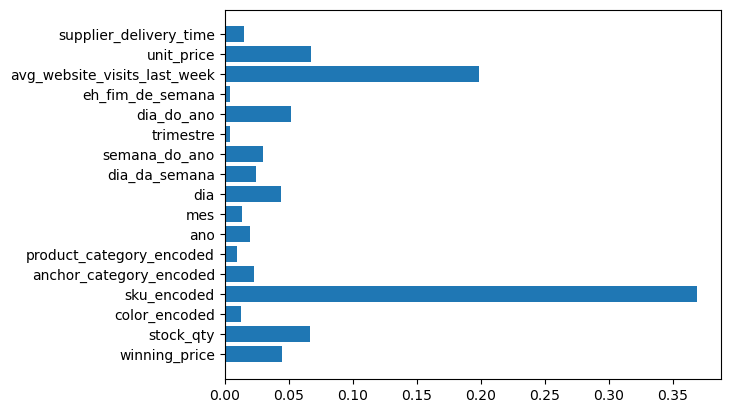

In [23]:
regressor.feature_importances_
plt.barh(df_randomforest.columns.values, regressor.feature_importances_)

# Conclusão do uso da coluna "winning_price" no modelo 

Durante o desenvolvimento do modelo, considerou-se a possibilidade de usar a coluna "winning_price" para melhorar o desempenho do modelo. Após uma discussão com os stakeholders, recomendou-se o uso desta, uma vez que eles afirmaram que essa variável exerce uma grande influência sobre as vendas.
Com base nos resultados do modelo e no gráfico de importância das características, concluiu-se que, embora a coluna do "winning price" seja relativamente importante, sua inclusão não tem um impacto positivo no modelo de regressão. Observou-se, após o treinamento do modelo, que tanto o RMSE quanto o R2 apresentaram piores desempenhos em relação ao modelo treinado sem a variável de cotação do dólar.

Modelo sem a feature "winning_price"

RMSE: 2.92

R2: 0.75

Modelo com a feature "winning_price"

RMSE: 3.96

R2 score: 0.60

Portanto, foi decidido que a feature "winning_price" não será utilizada no modelo principal.